# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
citiesfound = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
maxtemp = []
windspeed = []


print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each



timeBegin = time.time()
timeEnd = time.time()
timeElapsed = timeEnd-timeBegin
count = 0
cityset = 1

    
for city in cities:
    if count < 60 and timeElapsed % 60 != 0:
        try:
            print(f"Processing Record {count} of Set {cityset} | {city}")

            response = requests.get(query_url + city).json()
                
            cloudiness.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            maxtemp.append(response['main']['temp_max'])
            windspeed.append(response['wind']['speed'])
            citiesfound.append(city)
            
        except (KeyError, IndexError):
            print("City not found. Skipping...")
        count += 1
        timeEnd = time.time()
    else:
        time.sleep(max(0,60-timeElapsed))
        cityset += 1
        count =0
        
        
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")


#First thing to check: make sure we are
#under the number of API calls per minute, AKA count
#Then, we check to see how much time has passed.
#If it's less than 60, we proceed with the API call
#and the adding to the lists
#If it's more than 60, we wait until it passes 60, then reset count
#add to cityset, then continue with loop

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | mayumba
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | severo-kurilsk
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | marawi
Processing Record 8 of Set 1 | labuhan
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | mahudha
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | port hardy
Processing Record 13 of Set 1 | waingapu
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | sabzevar
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | borgarnes
Processing Record 21 of Set 1 | kununurra
Processing Record 22 of Set 1 | u

Processing Record 8 of Set 4 | namie
Processing Record 9 of Set 4 | ritchie
Processing Record 10 of Set 4 | khandbari
Processing Record 11 of Set 4 | ayan
Processing Record 12 of Set 4 | aksarka
Processing Record 13 of Set 4 | puerto ayora
Processing Record 14 of Set 4 | clonakilty
Processing Record 15 of Set 4 | payson
Processing Record 16 of Set 4 | cayenne
Processing Record 17 of Set 4 | jishu
Processing Record 18 of Set 4 | skibbereen
Processing Record 19 of Set 4 | cabo san lucas
Processing Record 20 of Set 4 | nanga eboko
Processing Record 21 of Set 4 | guerrero negro
Processing Record 22 of Set 4 | ovsyanka
Processing Record 23 of Set 4 | wajima
Processing Record 24 of Set 4 | sao raimundo das mangabeiras
Processing Record 25 of Set 4 | codrington
Processing Record 26 of Set 4 | miri
Processing Record 27 of Set 4 | guangyuan
Processing Record 28 of Set 4 | tarakan
Processing Record 29 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 30 of Set 4 | griffith
Pro

Processing Record 12 of Set 7 | barentu
Processing Record 13 of Set 7 | mayskiy
Processing Record 14 of Set 7 | lephepe
City not found. Skipping...
Processing Record 15 of Set 7 | ahome
Processing Record 16 of Set 7 | pacifica
Processing Record 17 of Set 7 | agar
Processing Record 18 of Set 7 | taganak
Processing Record 19 of Set 7 | sainte-martine
Processing Record 20 of Set 7 | barinitas
Processing Record 21 of Set 7 | sao miguel do araguaia
Processing Record 22 of Set 7 | batsfjord
Processing Record 23 of Set 7 | san andres
Processing Record 24 of Set 7 | goderich
Processing Record 25 of Set 7 | ponta delgada
Processing Record 26 of Set 7 | shenjiamen
Processing Record 27 of Set 7 | raudeberg
Processing Record 28 of Set 7 | tuatapere
Processing Record 29 of Set 7 | kosonsoy
Processing Record 30 of Set 7 | yershov
City not found. Skipping...
Processing Record 31 of Set 7 | khatanga
Processing Record 32 of Set 7 | along
Processing Record 33 of Set 7 | bambous virieux
Processing Record

Processing Record 23 of Set 10 | tonk
Processing Record 24 of Set 10 | narsaq
Processing Record 25 of Set 10 | praia
Processing Record 26 of Set 10 | nisia floresta
Processing Record 27 of Set 10 | matara
Processing Record 28 of Set 10 | kijabe
Processing Record 29 of Set 10 | zhigansk
Processing Record 30 of Set 10 | ternate
Processing Record 31 of Set 10 | pasighat
Processing Record 32 of Set 10 | megion
Processing Record 33 of Set 10 | dauphin
Processing Record 34 of Set 10 | dhidhdhoo
Processing Record 35 of Set 10 | sungaipenuh
Processing Record 36 of Set 10 | petatlan
Processing Record 37 of Set 10 | tidore
City not found. Skipping...
Processing Record 38 of Set 10 | karlskoga
Processing Record 39 of Set 10 | tevaitoa
Processing Record 40 of Set 10 | husavik
Processing Record 41 of Set 10 | nantucket
Processing Record 42 of Set 10 | moberly
Processing Record 43 of Set 10 | whitecourt
Processing Record 44 of Set 10 | galeana
Processing Record 45 of Set 10 | fairbanks
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
weather_data = pd.DataFrame({'City': citiesfound,
                             'Cloudiness':cloudiness,
                             'Country':country,
                             'Date': date,
                             'Humidity': humidity,
                             'Lat': lat,
                             'Lng':lon,
                             'Max Temp': maxtemp,
                             'Wind Speed':windspeed})

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mayumba,98,GA,1575059579,77,-3.44,10.65,81.21,10.31
1,butaritari,34,KI,1575059579,66,3.07,172.79,83.28,1.86
2,cape town,75,ZA,1575059458,60,-33.93,18.42,69.01,6.93
3,severo-kurilsk,89,RU,1575059579,86,50.68,156.12,20.28,22.39
4,vaini,67,IN,1575059579,79,15.34,74.49,68.83,8.41


In [49]:
weather_data.to_csv('Weather_data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

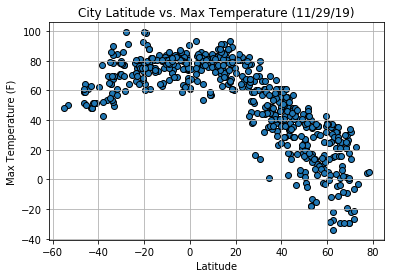

In [50]:
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], edgecolor='black')
plt.grid()
plt.title('City Latitude vs. Max Temperature (11/29/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("../Images/latvstemp.png")

#### Latitude vs. Humidity Plot

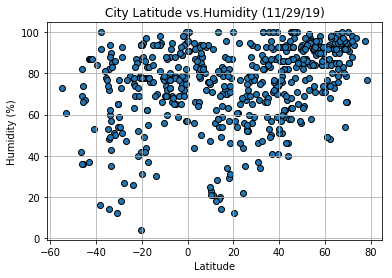

In [51]:
plt.scatter(weather_data['Lat'], weather_data['Humidity'], edgecolor='black')
plt.grid()
plt.title('City Latitude vs.Humidity (11/29/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../Images/latvshumidity.png")

#### Latitude vs. Cloudiness Plot

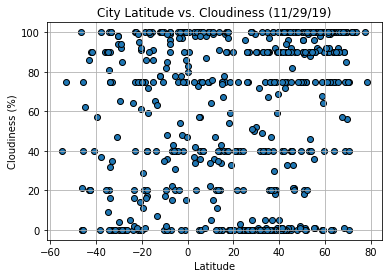

In [52]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], edgecolor='black')
plt.grid()
plt.title('City Latitude vs. Cloudiness (11/29/19)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../Images/latvscloudiness.png")

#### Latitude vs. Wind Speed Plot

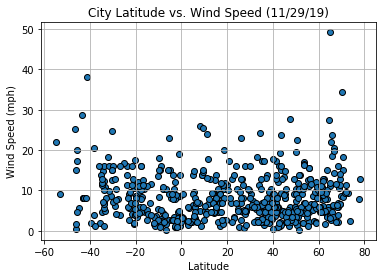

In [53]:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], edgecolor='black')
plt.grid()
plt.title('City Latitude vs. Wind Speed (11/29/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../Images/latvswindspeed.png")

# Observations
---

As I looked through the data, I found a few interesting observations. The first observation that I made was that when comparing the latitude to the max temperature, as the latitude increased from a negative number to zero, the max temperature went up, and when the number increased from 0 to a higher positive number, the max temperature began to decrease. This isn't unusual by any means. However, the decrease in temperature from 20 degrees to 60 degrees latitude is much steeper than the decrease from negative 20 to negative 60. If we look at the minumum values from negative 20 degrees latitude and positive 20 degrees latitude, which are both about 60 degrees, the negative 20 degrees latitude to negative 60 only drops by about 20 degrees. On the other hand, looking from positive 20 to positive 60, the temperature drops as much as **_80 degrees_**, which is a massive difference. Granted, I'm not sure how the weather works, but one would expect that if two pieces of land are equidistant from the equator, they would be similar in temperature. As we see in the data though, this does not appear to be the case. I suppose that this is due to other factors such as longitude and altitude, and would need to be looked into further.

The second observation that I made while looking through this data is for some reason, on both ends of the spectrum the humidity remains mostly the same. However, when you look at between 20 and 40 degrees latitude, whether positive or negative, there is a **_significant drop in humidity_** and then rises back to similar numbers as the ends of the spectrum when the latitude is closer to Zero. I'm not sure why in that particular area it is like that as well, and it would probably involve only certain areas that would need to be looked into further as well and would also be determined by other factors such as longitude and altitude.

One last observation that I made is that wind speed is rather consistent across the spectrum, minus on the ends of the spectrum where the wind speed has some outliers that can be almost double that of most other areas. I'm guessing these would also be determined more so by other factors such as longitude and latitude as well.